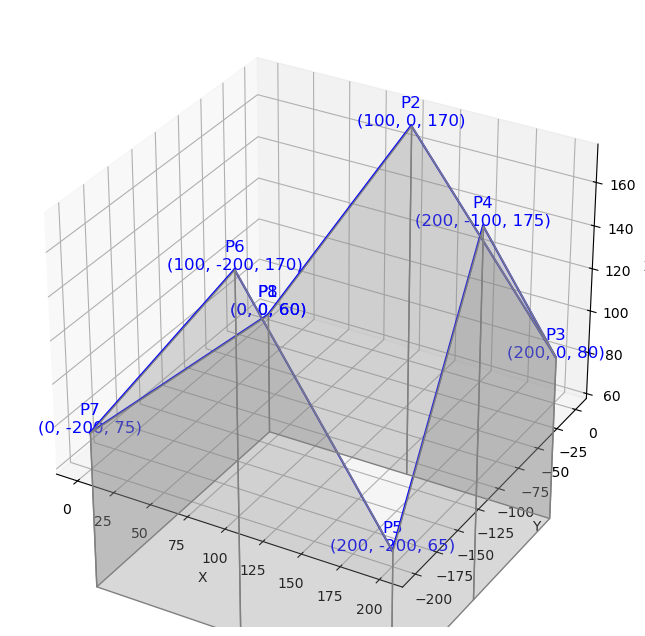

El área calculada trigonométricamente de la superficie es: 86250.0
La longitud total de la curva suave C es: 1053.2816111010975
Área exacta: 86000
Área calculada: 86250.0
Error absoluto: 250.0
Error relativo: 0.29%


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.integrate import quad  # Importar quad

# Puntos relativos
puntos_relativos = [(0,0,0),(100,0, 100), (100,0 ,-100), (0,-100 ,100), (0, -100,-100 ),(-100,0,100), (-100,0 ,-100), (0,200,0)]

# Lista de alturas capturadas por el dron (valores aproximados para pruebas)
altura_cp =   [60,170, 80, 175, 65, 170, 75, 60]



# Crear la lista_int con los valores de z sustituidos por altura_cp
lista_int = [(punto[0], punto[1], altura_cp[i]) for i, punto in enumerate(puntos_relativos)]



# Asegurar que la longitud de altura_cp coincide con la cantidad de puntos relativos
if len(altura_cp) != len(puntos_relativos):
    raise ValueError("La lista de alturas no coincide con la cantidad de puntos relativos")

# Ajustar el primer punto relativo para que empiece en la altura inicial (usando altura_cp)
puntos_relativos[0] = (0, 0, altura_cp[0])

# Puntos absolutos (inicialmente el primer punto es el origen)
puntos_absolutos = [puntos_relativos[0]]

# Calcular los puntos absolutos con respecto al origen
for i in range(1, len(puntos_relativos)):
    punto_relativo = puntos_relativos[i]
    punto_absoluto = (
        puntos_absolutos[i - 1][0] + punto_relativo[0],
        puntos_absolutos[i - 1][1] + punto_relativo[1],
        altura_cp[i]  # Usar la altura capturada por el dron
    )
    puntos_absolutos.append(punto_absoluto)


# Crear figura y ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos con respecto al origen
for i, punto in enumerate(puntos_absolutos):
    ax.text(punto[0], punto[1], punto[2], f'P{i+1}\n{punto}', color='blue', fontsize=12, ha='center')

# Unir los puntos con líneas
for i in range(len(puntos_absolutos) - 1):
    ax.plot([puntos_absolutos[i][0], puntos_absolutos[i+1][0]],
            [puntos_absolutos[i][1], puntos_absolutos[i+1][1]],
            [puntos_absolutos[i][2], puntos_absolutos[i+1][2]], c='b')

# Graficar el área bajo las líneas
for i in range(len(puntos_absolutos) - 1):
    poly = [[puntos_absolutos[i][0], puntos_absolutos[i][1], puntos_absolutos[i][2]],
            [puntos_absolutos[i+1][0], puntos_absolutos[i+1][1], puntos_absolutos[i+1][2]],
            [puntos_absolutos[i+1][0], puntos_absolutos[i+1][1], 0],
            [puntos_absolutos[i][0], puntos_absolutos[i][1], 0]]
    ax.add_collection3d(Poly3DCollection([poly], color='gray', alpha=0.3))

# Configuración adicional
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostrar la gráfica
plt.show()


# Calcular el área total de la superficie
area_total = 0

for i in range(len(puntos_absolutos) - 1):
    # Definir los vértices del cuadrilátero
    A = np.array(puntos_absolutos[i])
    B = np.array(puntos_absolutos[i+1])
    C = np.array([puntos_absolutos[i+1][0], puntos_absolutos[i+1][1], 0])
    D = np.array([puntos_absolutos[i][0], puntos_absolutos[i][1], 0])

    # Calcular el área de cada triángulo
    area_tri_1 = 0.5 * np.linalg.norm(np.cross(B - A, C - A))
    area_tri_2 = 0.5 * np.linalg.norm(np.cross(C - A, D - A))

    # Sumar el área de los dos triángulos para obtener el área del cuadrilátero
    area_cuadrilatero = area_tri_1 + area_tri_2

    # Sumar el área del cuadrilátero al área total
    area_total += area_cuadrilatero

print('El área calculada trigonométricamente de la superficie es:', area_total)

# Calcular las diferencias entre puntos consecutivos
diferencias = []
for i in range(1, len(puntos_absolutos)):
    diferencia = (
        puntos_absolutos[i][0] - puntos_absolutos[i - 1][0],
        puntos_absolutos[i][1] - puntos_absolutos[i - 1][1],
        puntos_absolutos[i][2] - puntos_absolutos[i - 1][2]
    )
    diferencias.append(diferencia)

# Calcular las pendientes de cada diferencia
pendientes = []
for dif in diferencias:
    dx = np.sqrt(dif[0]**2 + dif[1]**2)  # Distancia en el plano XY
    dy = dif[2]  # Cambio en la altura
    if dx != 0:
        pendiente = dy / dx  # Pendiente en el espacio 3D
    else:
        pendiente = float('inf')  # Pendiente infinita si dx es cero
    pendientes.append(pendiente)

# Filtrar las pendientes para eliminar los valores infinitos
m_f = [m for m in pendientes if m != float('inf')]


areas = []


def f2(x):
    return m_f[0] * (x - lista_int[0][0]) + lista_int[0][2]
    
are2, _ = quad(f2, 0, 100)
areas.append(are2)

def f3(x):
    return m_f[1] * (x - lista_int[1][1]) + lista_int[1][2]
    
are3, _ = quad(f3, 0, 100)
areas.append(are3)


def f4(x):
    return m_f[2] * (x - lista_int[2][1]) + lista_int[2][2]
    
are4, _ = quad(f4, 0, 100)
areas.append(are4)

def f5(x):
    return m_f[3] * (x - lista_int[3][0]) + lista_int[3][2]
    
are5, _ = quad(f5, 0, 100)
areas.append(are5)

def f6(x):
    return m_f[4] * (x - lista_int[4][0]) + lista_int[4][2]
    
are6, _ = quad(f6, 0, 100)
areas.append(are6)

def f7(x):
    return m_f[5] * (x - lista_int[5][1]) + lista_int[5][2]
    
are7, _ = quad(f7, 0, 100)
areas.append(are7)

def f8(x):
    return m_f[6] * (x - lista_int[6][1]) + lista_int[6][2]
    
are8, _ = quad(f8, 0, 200)
areas.append(are8)




# Calcular la longitud de la curva suave C
longitud_total = 0
for i in range(1, len(puntos_absolutos)):
    punto_anterior = puntos_absolutos[i - 1]
    punto_actual = puntos_absolutos[i]
    distancia = np.sqrt((punto_actual[0] - punto_anterior[0])**2 + (punto_actual[1] - punto_anterior[1])**2 + (punto_actual[2] - punto_anterior[2])**2)
    longitud_total += distancia

print('La longitud total de la curva suave C es:', longitud_total)



# Área exacta conocida
area_exacta = 86000

# Área calculada (aquí deberías reemplazar con el valor calculado en tu código)
area_calculada = sum(areas)  # Reemplaza con tu área calculada

# Calcular el error absoluto
error_absoluto = abs(area_exacta - area_calculada)

# Calcular el error relativo (en porcentaje)
error_relativo = (error_absoluto / area_exacta) * 100

print(f'Área exacta: {area_exacta}')
print(f'Área calculada: {area_calculada}')
print(f'Error absoluto: {error_absoluto}')
print(f'Error relativo: {error_relativo:.2f}%')


